# EDA Structuring Data

In this script, I perform an Exploratory Data Analysis (EDA) on facial recognition image data using powerful libraries like Numpy, Pandas, Matplotlib, OpenCV, and PIL.

I start by gathering the file paths of male and female images and calculating their sizes. Using descriptive statistics and creating visualizations such as a boxplot and histogram, I examine the distribution of image sizes.

After I filter out any images smaller than 60 in size, I extract the gender information from the file paths and visualize the distribution of genders within the dataset.

Next, I define a function to resize and flatten the images to grayscale, and store this structured data alongside the gender labels in a DataFrame.

Finally, I serialize the DataFrame using Python's pickle module. This process allows me to store and retrieve the data efficiently, making it readily available for any future machine learning tasks.

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import cv2  # Import OpenCV library to deal with image and video data.
from PIL import Image  # Import PIL library to perform operations on images.
%matplotlib inline  

In [4]:
from glob import glob  # Import glob module to retrieve files/pathnames matching a specified pattern.
female = glob(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\crop\female_crop\*.png')  # Get all paths of female images.
male = glob(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\crop\male_crop\*.png')  # Get all paths of male images.
path = female + male  # Concatenate the paths of female and male images.

In [5]:
# Function to get the size of an image.
def getSize(path):
    img = Image.open(path)  # Open the image using the path.
    return img.size[0]  # Return the size (width) of the image.

In [6]:
df = pd.DataFrame(data=path,columns=['path'])  # Create a dataframe with the image paths.
df['size'] = df['path'].apply(getSize)  # Apply the getSize function to each path in the dataframe.

In [9]:
df.describe()  # Generate descriptive statistics of the dataframe.

,size
count,6058.000000
mean,154.140971
std,71.559807
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<Axes: >

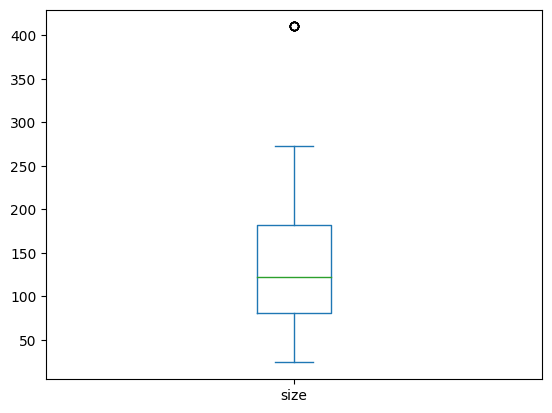

In [33]:
df['size'].plot(kind='box')

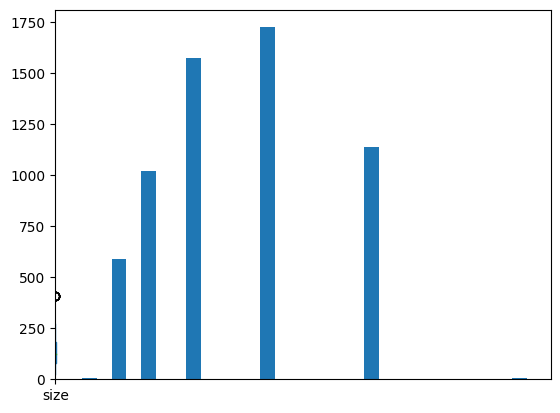

In [10]:
df['size'].plot(kind='box') # Create a box plot of the 'size' column.
plt.hist(df['size'],bins=30)  # Create a histogram of the 'size' column.
plt.show()  # Display the plot.

In [11]:
df_new = df[df['size'] > 60]  # Create a new dataframe only with images that have a size greater than 60.

In [34]:
df_new

,path,size,gender,structure_data
0,W:\MayCooperStation\New Documents\Data Science...,273,W:\MayCooperStation\New Documents\Data Science...,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,W:\MayCooperStation\New Documents\Data Science...,81,W:\MayCooperStation\New Documents\Data Science...,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."
...,...,...,...,...
6053,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[31, 31, 31, 31, 31, 31, 31, 31, 30, 29, 29, 3..."
6054,W:\MayCooperStation\New Documents\Data Science...,273,W:\MayCooperStation\New Documents\Data Science...,"[88, 41, 33, 18, 15, 14, 13, 29, 25, 74, 114, ..."
6055,W:\MayCooperStation\New Documents\Data Science...,122,W:\MayCooperStation\New Documents\Data Science...,"[25, 25, 26, 25, 26, 31, 35, 46, 60, 114, 195,..."
6056,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[21, 27, 31, 24, 19, 24, 21, 19, 31, 36, 15, 2..."


In [35]:
# Function to get the gender from the path string.
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]  # Split the string by underscore and slash to get the gender.
    except:
        return None  

In [36]:
df['gender'] = df['path'].apply(gender)  # Apply the gender function to each path in the dataframe.

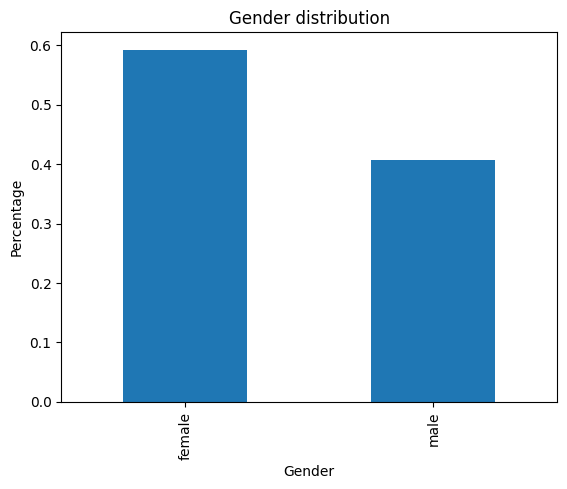

In [23]:
# Function to extract gender from path
def get_gender(path):
    return path.split('\\')[-2].split('_')[0]

# Apply the function to the 'path' column to create a new 'gender' column
df['gender'] = df['path'].apply(get_gender)

# Create a bar plot of the normalized value counts of 'gender' column
df['gender'].value_counts(normalize=True).plot(kind='bar')

# Labeling the plot
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender distribution')
plt.show()


1. 60 % Female are there and rest 40% are male
2. All the images size is greater than or equal to 81

conclusion : resizing all the image in df_new to 100 x 100 array

## Resize Image

In [24]:
# Function to resize and flatten the image.
def resize_img(path_to_resize):
    try:
        img = cv2.imread(path_to_resize)  # Read the image.
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale.
        size = gray.shape[0]  # Get the size (width) of the image.
        if size >= 100:  # If the size is greater or equal to 100, shrink the image.
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:  # If the size is less than 100, enlarge the image.
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
        return gray_re.flatten()  # Flatten the resized image and return it.
    except:
        return None  # If it is not possible, return None.

In [37]:
len(resize_img(path[0]))

10000

In [40]:
df_new.loc[:, 'gender'] = df_new['path'].apply(gender)
df_new.head()

,path,size,gender,structure_data
0,W:\MayCooperStation\New Documents\Data Science...,273,W:\MayCooperStation\New Documents\Data Science...,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,W:\MayCooperStation\New Documents\Data Science...,182,W:\MayCooperStation\New Documents\Data Science...,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,W:\MayCooperStation\New Documents\Data Science...,81,W:\MayCooperStation\New Documents\Data Science...,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."


In [42]:
# structuring function
df_new.loc[:, 'structure_data'] = df_new['path'].apply(resize_img)

In [43]:
# copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)

In [44]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [45]:
df2.head()


,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,W:\MayCooperStation\New Documents\Data Science...,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,W:\MayCooperStation\New Documents\Data Science...,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,W:\MayCooperStation\New Documents\Data Science...,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,W:\MayCooperStation\New Documents\Data Science...,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,W:\MayCooperStation\New Documents\Data Science...,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


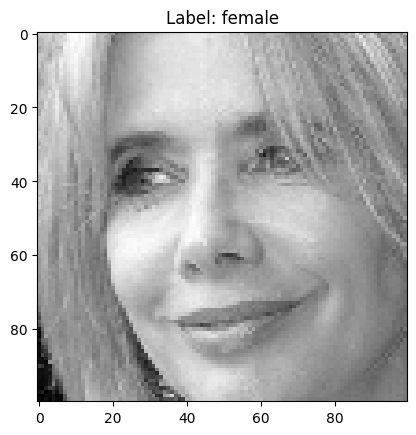

In [50]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: female")
plt.show()

## Saving DataFrames Using Pickle Format

The pickle format is commonly used in machine learning (ML) for saving and loading trained models, intermediate data structures, or any Python objects. Here are some reasons why the pickle format is widely used in ML:

1. Object Serialization: Pickle provides a convenient way to serialize Python objects into a byte stream. In ML, this allows you to save trained models, including their architecture, parameters, and state, as well as other relevant objects like feature transformers or preprocessing pipelines. Serialized objects can be stored as files, transferred across systems, and later deserialized to reconstruct the original objects.

2. Platform Independence: Pickle format is platform-independent, which means you can serialize objects on one system and deserialize them on another system with a different architecture or operating system. This flexibility is essential when sharing ML models or collaborating across different environments.

3. Preserve Model State: ML models often involve extensive training, and saving the trained model in pickle format allows you to preserve its state. This means you can load the model later and continue training, make predictions, or perform other operations without starting from scratch.

4. Integration with Python Ecosystem: Pickle is a built-in module in Python, making it seamlessly integrate with the broader Python ecosystem. It is supported by many libraries and frameworks used in ML, such as scikit-learn, TensorFlow, PyTorch, and more. This makes it easy to use pickle to save and load objects in ML workflows.

5. Efficiency: Pickle provides a relatively efficient way to serialize and deserialize objects. The serialization process converts the objects into a compact binary representation, enabling efficient storage and transfer. This is especially useful when dealing with large models or datasets.

In [51]:
# Saving images in pickle format
import pickle

pickle.dump(df2, open(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\dataframe_images_100_100.pickle', 'wb'))